In [133]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph, START, END
import random

In [134]:
class AgentState(TypedDict):
    guesses: List[int]
    upper_bound: int
    lower_bound: int
    name: str
    attempts: int
    result : str
    target : int

In [135]:
def setup_node(state:AgentState) -> AgentState:
    state["guesses"] = []
    state["attempts"] = 0
    state["target"] = random.randint(state["lower_bound"], state["upper_bound"])
    state["result"] = f"Hi {state["name"]}, I am thinking of a number...\n Got it, let the game begin!"
    print(state)
    return state

In [136]:
def guess_node(state:AgentState) -> AgentState:
    if state["lower_bound"] == state["upper_bound"]:
        guess = state["upper_bound"]
    else:
        guess = random.randint(state["lower_bound"], state["upper_bound"])
    state["guesses"].append(guess)
    state["attempts"] = state["attempts"] + 1
    state["result"] = state["result"] + f"\nI have guessed: {guess}"
    print(state)
    return state

In [137]:
def checker_node(state:AgentState) -> AgentState:
    latest_guess = state["guesses"][-1]
    if latest_guess == state["target"]:
        state["result"] = state["result"] + f"\n Correct. Game over!"
    elif latest_guess > state["target"]:
        state["upper_bound"] = min(latest_guess -1, state["upper_bound"])
        state["result"] = state["result"] + f"\n Wrong! Too high"
    elif latest_guess < state["target"]:
        state["lower_bound"] = max(latest_guess +1,state["target"])
        state["result"] = state["result"] + f"\n Wrong! Too low"
    return state
    

In [138]:
def should_continue(state:AgentState) -> AgentState:
    latest_guess = state["guesses"][-1]
    if latest_guess == state["target"]:
        return "exit"
    elif state["attempts"] == 7:
        print("Too many guesses")
        return "exit"
    return "loop"
        

In [139]:
graph = StateGraph(AgentState)
graph.add_node("setup_node", setup_node)
graph.add_node("guess_node", guess_node)
graph.add_node("checker_node", checker_node)
graph.add_edge(START, "setup_node")
graph.add_edge("setup_node","guess_node")
graph.add_edge("guess_node", "checker_node")
graph.add_conditional_edges(
    "checker_node",
    should_continue,
    {
        "loop" : "guess_node",
        "exit" : END
    }
)
app = graph.compile()

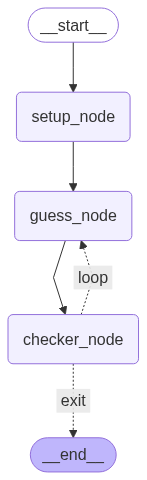

In [140]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [157]:
answer = app.invoke({"name":"Jack", "upper_bound":100, "lower_bound":1})

print(answer["result"])

{'upper_bound': 100, 'lower_bound': 1, 'name': 'Jack', 'guesses': [], 'attempts': 0, 'target': 1, 'result': 'Hi Jack, I am thinking of a number...\n Got it, let the game begin!'}
{'guesses': [100], 'upper_bound': 100, 'lower_bound': 1, 'name': 'Jack', 'attempts': 1, 'result': 'Hi Jack, I am thinking of a number...\n Got it, let the game begin!\nI have guessed: 100', 'target': 1}
{'guesses': [100, 65], 'upper_bound': 99, 'lower_bound': 1, 'name': 'Jack', 'attempts': 2, 'result': 'Hi Jack, I am thinking of a number...\n Got it, let the game begin!\nI have guessed: 100\n Wrong! Too high\nI have guessed: 65', 'target': 1}
{'guesses': [100, 65, 60], 'upper_bound': 64, 'lower_bound': 1, 'name': 'Jack', 'attempts': 3, 'result': 'Hi Jack, I am thinking of a number...\n Got it, let the game begin!\nI have guessed: 100\n Wrong! Too high\nI have guessed: 65\n Wrong! Too high\nI have guessed: 60', 'target': 1}
{'guesses': [100, 65, 60, 17], 'upper_bound': 59, 'lower_bound': 1, 'name': 'Jack', 'att